In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [3]:
from tensorflow.keras.datasets import cifar10

In [4]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [5]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [6]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [7]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [8]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [9]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]

# 建立模型

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Activation, Flatten

In [11]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               5

# 訓練模型

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [14]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=10,verbose=2)       

Epoch 1/10
200/200 - 14s - loss: 1.6436 - acc: 0.4159 - val_loss: 1.3768 - val_acc: 0.5236 - 14s/epoch - 69ms/step
Epoch 2/10
200/200 - 2s - loss: 1.2651 - acc: 0.5568 - val_loss: 1.2340 - val_acc: 0.5660 - 2s/epoch - 8ms/step
Epoch 3/10
200/200 - 1s - loss: 1.1264 - acc: 0.6060 - val_loss: 1.1068 - val_acc: 0.6185 - 1s/epoch - 7ms/step
Epoch 4/10
200/200 - 1s - loss: 1.0234 - acc: 0.6436 - val_loss: 1.0740 - val_acc: 0.6235 - 1s/epoch - 7ms/step
Epoch 5/10
200/200 - 1s - loss: 0.9487 - acc: 0.6722 - val_loss: 0.9763 - val_acc: 0.6654 - 1s/epoch - 7ms/step
Epoch 6/10
200/200 - 1s - loss: 0.8960 - acc: 0.6901 - val_loss: 0.9620 - val_acc: 0.6713 - 1s/epoch - 7ms/step
Epoch 7/10
200/200 - 2s - loss: 0.8439 - acc: 0.7078 - val_loss: 0.9827 - val_acc: 0.6602 - 2s/epoch - 8ms/step
Epoch 8/10
200/200 - 2s - loss: 0.7978 - acc: 0.7250 - val_loss: 0.9313 - val_acc: 0.6830 - 2s/epoch - 8ms/step
Epoch 9/10
200/200 - 1s - loss: 0.7631 - acc: 0.7375 - val_loss: 0.9035 - val_acc: 0.6923 - 1s/epoch 

In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

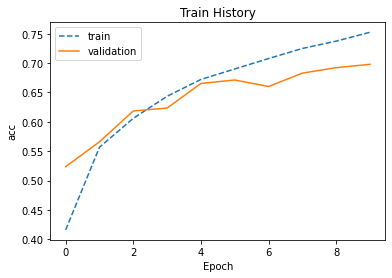

In [16]:
show_train_history(train_history,'acc','val_acc')

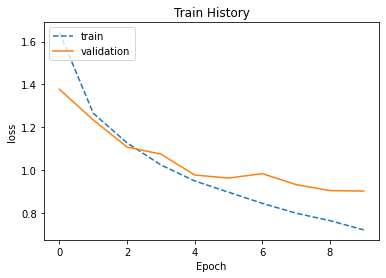

In [17]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [18]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.9019 - acc: 0.6922 - 1s/epoch - 4ms/step


In [19]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.9019458293914795 test_acc= 0.6922000050544739


# 進行預測

In [20]:
probability = model.predict(x_test_normalize)

In [21]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [22]:
prediction

array([3, 8, 8, ..., 5, 1, 7])

# 查看預測結果

In [23]:
import matplotlib.pyplot as plt 

In [24]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [25]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

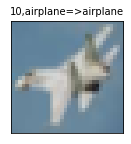

In [26]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=10,num=1)

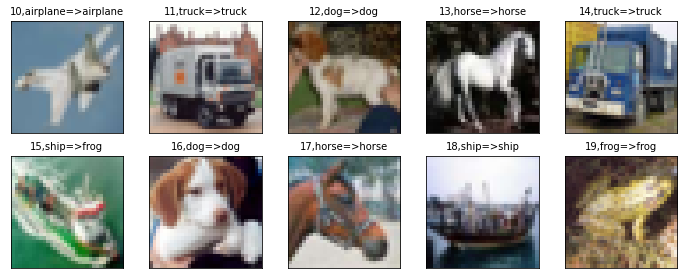

In [27]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=10,num=10)

# 查看預測機率

In [28]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

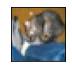

label: cat
predict: cat
airplane   Probability:0.001414346
automobile Probability:0.000146566
bird       Probability:0.000632579
cat        Probability:0.849645257
deer       Probability:0.007426613
dog        Probability:0.119773865
frog       Probability:0.004406372
horse      Probability:0.002398786
ship       Probability:0.012406384
truck      Probability:0.001749318


In [29]:
show_predicted_probability(x_test_image,y_test_label,
                           prediction,probability,0) 

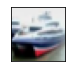

label: ship
predict: ship
airplane   Probability:0.016797272
automobile Probability:0.232118934
bird       Probability:0.000006044
cat        Probability:0.000023937
deer       Probability:0.000019055
dog        Probability:0.000001660
frog       Probability:0.000001401
horse      Probability:0.000003359
ship       Probability:0.748235106
truck      Probability:0.002793266


In [30]:
show_predicted_probability(x_test_image,y_test_label,
                           prediction,probability,1) 

# confusion matrix

In [31]:
import pandas as pd

In [32]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [33]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,795,21,7,18,35,4,9,13,66,32
1,37,796,2,8,10,7,9,6,29,96
2,94,6,390,68,191,88,74,61,15,13
3,28,11,37,449,148,173,74,47,24,9
4,26,3,24,37,777,24,33,58,16,2
5,18,2,22,146,101,603,25,60,17,6
6,6,5,24,50,91,21,777,12,8,6
7,23,3,9,18,95,45,6,792,4,5
8,89,38,3,15,13,5,6,5,792,34


#heapmap cm

In [34]:
import numpy as np

In [35]:
cm_mat=cm.to_numpy()

In [36]:
cm_mat

array([[795,  21,   7,  18,  35,   4,   9,  13,  66,  32],
       [ 37, 796,   2,   8,  10,   7,   9,   6,  29,  96],
       [ 94,   6, 390,  68, 191,  88,  74,  61,  15,  13],
       [ 28,  11,  37, 449, 148, 173,  74,  47,  24,   9],
       [ 26,   3,  24,  37, 777,  24,  33,  58,  16,   2],
       [ 18,   2,  22, 146, 101, 603,  25,  60,  17,   6],
       [  6,   5,  24,  50,  91,  21, 777,  12,   8,   6],
       [ 23,   3,   9,  18,  95,  45,   6, 792,   4,   5],
       [ 89,  38,   3,  15,  13,   5,   6,   5, 792,  34],
       [ 50,  91,   2,  11,  16,   7,   9,  30,  33, 751]])

In [37]:
cm_mat.sum(axis=0)

array([1166,  976,  520,  820, 1477,  977, 1022, 1084, 1004,  954])

In [38]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [39]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [40]:
cm_norm

array([[0.795, 0.021, 0.007, 0.018, 0.035, 0.004, 0.009, 0.013, 0.066,
        0.032],
       [0.037, 0.796, 0.002, 0.008, 0.01 , 0.007, 0.009, 0.006, 0.029,
        0.096],
       [0.094, 0.006, 0.39 , 0.068, 0.191, 0.088, 0.074, 0.061, 0.015,
        0.013],
       [0.028, 0.011, 0.037, 0.449, 0.148, 0.173, 0.074, 0.047, 0.024,
        0.009],
       [0.026, 0.003, 0.024, 0.037, 0.777, 0.024, 0.033, 0.058, 0.016,
        0.002],
       [0.018, 0.002, 0.022, 0.146, 0.101, 0.603, 0.025, 0.06 , 0.017,
        0.006],
       [0.006, 0.005, 0.024, 0.05 , 0.091, 0.021, 0.777, 0.012, 0.008,
        0.006],
       [0.023, 0.003, 0.009, 0.018, 0.095, 0.045, 0.006, 0.792, 0.004,
        0.005],
       [0.089, 0.038, 0.003, 0.015, 0.013, 0.005, 0.006, 0.005, 0.792,
        0.034],
       [0.05 , 0.091, 0.002, 0.011, 0.016, 0.007, 0.009, 0.03 , 0.033,
        0.751]])

In [41]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [42]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.795,0.021,0.007,0.018,0.035,0.004,0.009,0.013,0.066,0.032
automobile,0.037,0.796,0.002,0.008,0.010,0.007,0.009,0.006,0.029,0.096
bird,0.094,0.006,0.390,0.068,0.191,0.088,0.074,0.061,0.015,0.013
cat,0.028,0.011,0.037,0.449,0.148,0.173,0.074,0.047,0.024,0.009
deer,0.026,0.003,0.024,0.037,0.777,0.024,0.033,0.058,0.016,0.002
dog,0.018,0.002,0.022,0.146,0.101,0.603,0.025,0.060,0.017,0.006
frog,0.006,0.005,0.024,0.050,0.091,0.021,0.777,0.012,0.008,0.006
horse,0.023,0.003,0.009,0.018,0.095,0.045,0.006,0.792,0.004,0.005
ship,0.089,0.038,0.003,0.015,0.013,0.005,0.006,0.005,0.792,0.034
truck,0.050,0.091,0.002,0.011,0.016,0.007,0.009,0.030,0.033,0.751


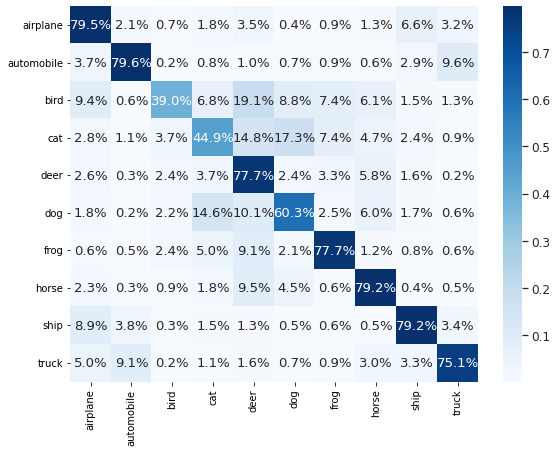

In [43]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#CF function

In [44]:
class_names =["airplane","automobile","bird","cat","deer",
              "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

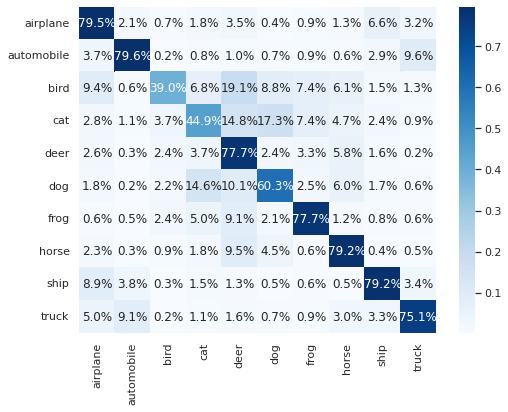

In [45]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [46]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [47]:
df[:5]

,label,predict
0,3,3
1,8,8
2,8,8
3,0,0
4,6,6


In [48]:
df[(df.label==5)&(df.predict==3)]

,label,predict
33,5,3
42,5,3
101,5,3
128,5,3
158,5,3
...,...,...
9657,5,3
9804,5,3
9823,5,3
9985,5,3


# 查看預測錯誤資料

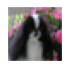

label: dog
predict: cat
airplane   Probability:0.001134901
automobile Probability:0.000278871
bird       Probability:0.002665370
cat        Probability:0.589566946
deer       Probability:0.002180923
dog        Probability:0.248655483
frog       Probability:0.000007459
horse      Probability:0.141043797
ship       Probability:0.000273536
truck      Probability:0.014192643


In [49]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,42)

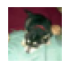

label: dog
predict: cat
airplane   Probability:0.023954449
automobile Probability:0.002878473
bird       Probability:0.008868740
cat        Probability:0.385042340
deer       Probability:0.011463637
dog        Probability:0.236242756
frog       Probability:0.329724908
horse      Probability:0.001171943
ship       Probability:0.000343313
truck      Probability:0.000309429


In [50]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,128)

#建立儲存模型路徑

In [51]:
!mkdir -p Model/CifarCNN 

In [52]:
ls -l Model 

total 4
drwxr-xr-x 2 root root 4096 May 30 02:39 CifarCNN/



# 儲存整個模型 (HDF5)


In [53]:
model.save("Model/CifarCNN/whole.h5",
           save_format='h5',
           overwrite=True)
print("Save model whole") 

Save model whole


查看檔案

In [54]:
!ls -l Model/CifarCNN 

total 6436
-rw-r--r-- 1 root root 6586952 May 30 02:39 whole.h5


#匯出為SavedModel格式(Export to SavedModel)

In [55]:
model.save("Model/CifarCNN/SavedModel",
           save_format='tf')
print("Save model to SavedModel")

INFO:tensorflow:Assets written to: Model/CifarCNN/SavedModel/assets
Save model to SavedModel


查看檔案

In [56]:
ls -l Model/CifarCNN 

total 6440
drwxr-xr-x 4 root root    4096 May 30 02:39 SavedModel/
-rw-r--r-- 1 root root 6586952 May 30 02:39 whole.h5


In [57]:
ls -l Model/CifarCNN/SavedModel 

total 148
drwxr-xr-x 2 root root   4096 May 30 02:39 assets/
-rw-r--r-- 1 root root  15143 May 30 02:39 keras_metadata.pb
-rw-r--r-- 1 root root 125463 May 30 02:39 saved_model.pb
drwxr-xr-x 2 root root   4096 May 30 02:39 variables/


# 儲存模型結構

使用model.to_json()儲存模型結構

In [58]:
model_json = model.to_json()

In [59]:
print(model_json) 

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 32, 32, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "dat

In [60]:
with open("Model/CifarCNN/structure.json", "w") as json_file:
    json_file.write(model_json)
    print("Save model structure")

Save model structure


In [61]:
ls -l Model/CifarCNN

total 6444
drwxr-xr-x 4 root root    4096 May 30 02:39 SavedModel/
-rw-r--r-- 1 root root    2822 May 30 02:39 structure.json
-rw-r--r-- 1 root root 6586952 May 30 02:39 whole.h5


使用model.save_weights()儲存模型weight

In [62]:
model.save_weights("Model/CifarCNN/weight.h5") 
print("Save model weight")

Save model weight


In [63]:
ls -l Model/CifarCNN

total 8596
drwxr-xr-x 4 root root    4096 May 30 02:39 SavedModel/
-rw-r--r-- 1 root root    2822 May 30 02:39 structure.json
-rw-r--r-- 1 root root 2201784 May 30 02:39 weight.h5
-rw-r--r-- 1 root root 6586952 May 30 02:39 whole.h5


#掛載google個人雲端硬碟

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
!ls  /content/drive/MyDrive

 BK		    MP21924_example	        MP21924_example_O
'Colab Notebooks'   MP21924_example_fit
 Model		    MP21924_example_installed


In [66]:
!pwd

/content


In [67]:
!ls drive/MyDrive

 BK		    MP21924_example	        MP21924_example_O
'Colab Notebooks'   MP21924_example_fit
 Model		    MP21924_example_installed


複製虛擬機  目錄===>至雲端硬碟

In [68]:
!cp -r Model drive/MyDrive

In [69]:
ls -l drive/MyDrive

total 28
drwx------ 2 root root 4096 Mar 21 02:32  BK/
drwx------ 2 root root 4096 Feb 22  2019 'Colab Notebooks'/
drwx------ 3 root root 4096 Jun 29  2021  Model/
drwx------ 2 root root 4096 May 21 05:32  MP21924_example/
drwx------ 2 root root 4096 May 29 12:39  MP21924_example_fit/
drwx------ 2 root root 4096 May 10 03:00  MP21924_example_installed/
drwx------ 2 root root 4096 May 21 05:32  MP21924_example_O/


In [70]:
ls -l drive/MyDrive/Model

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 3 root root     4096 May 30 02:39 CifarCNN/
drwx------ 2 root root     4096 Feb  2 14:35 CifarCNNFunc/
drwx------ 2 root root     4096 Mar 20 08:54 CifarCNNSub/


In [71]:
ls -l drive/MyDrive/Model/CifarCNN

total 8591
drwx------ 4 root root    4096 May 30 02:39 SavedModel/
-rw------- 1 root root    2822 May 30 02:39 structure.json
-rw------- 1 root root 2201784 May 30 02:39 weight.h5
-rw------- 1 root root 6586952 May 30 02:39 whole.h5
